# Recommendation_system

## 1. Data Loading and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [4]:
# Display sample data
print(movie_ratings.head())

   userId  movieId  rating   timestamp          title       genres
0       1       16     4.0  1217897793  Casino (1995)  Crime|Drama
1       9       16     4.0   842686699  Casino (1995)  Crime|Drama
2      12       16     1.5  1144396284  Casino (1995)  Crime|Drama
3      24       16     4.0   963468757  Casino (1995)  Crime|Drama
4      29       16     3.0   836820223  Casino (1995)  Crime|Drama


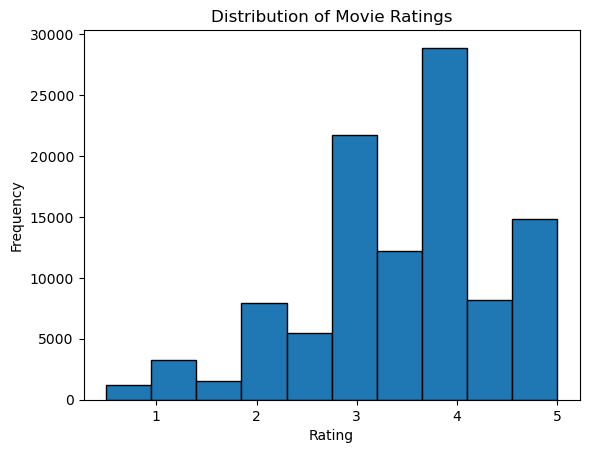

In [5]:
import matplotlib.pyplot as plt

# Show distribution of movie ratings
plt.hist(movie_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## 2. Data Preprocessing

In [6]:
# Remove unnecessary columns
movie_ratings = movie_ratings.drop(['timestamp', 'genres'], axis=1)

In [7]:
# Create user-item matrix
user_item_matrix = movie_ratings.pivot_table(index='userId', columns='movieId', values='rating')

In [8]:
# Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

In [9]:
# Display sample user-item matrix
print(user_item_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  144482  144656  144976  146344  146656  146684  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [10]:
# Display sample user-item matrix
print(user_item_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  144482  144656  144976  146344  146656  146684  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

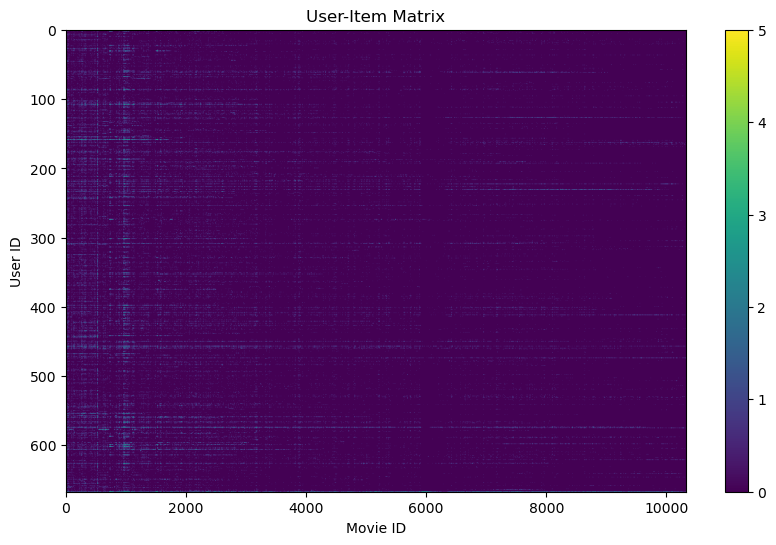

In [11]:
# Show heatmap of user-item matrix
plt.figure(figsize=(10, 6))
plt.imshow(user_item_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('User-Item Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

## 3. Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2)


## 4. Singular Value Decomposition (SVD)

In [13]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
import numpy as np

# Convert train_data to a sparse matrix
train_data_sparse = csr_matrix(train_data)

# Perform SVD
U, sigma, Vt = svds(train_data_sparse, k=50)  # Choosing k=50 for this example
sigma = np.diag(sigma)

## 5. Predictions

In [14]:
# Predict ratings for the testing set
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert predicted ratings into a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=train_data.columns, index=train_data.index)

## 6. Evaluation

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Flatten actual and predicted ratings
actual_ratings = test_data.values.flatten()
predicted_ratings = predicted_ratings_df.iloc[:test_data.shape[0], :test_data.shape[1]].values.flatten()

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.5073846732268742


## 7. Recommendations

In [16]:
import random

# Function to recommend movies for a given user
def recommend_movies(user_id, top_n=5):
    try:
        user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
        user_ratings = user_ratings[~user_ratings.index.isin(train_data.columns)]
        top_movies = user_ratings.head(top_n)
        return top_movies
    except KeyError:
        print(f"User {user_id} not found. Recommending a random movie instead.")
        # Return a random movie title or genre from the dataset
        random_movie = movie_ratings.sample(1)['title'].values[0]
        return f"Try watching: {random_movie}"

# Example usage: Recommend movies for user_id 1
recommended_movies = recommend_movies(1)
print("Recommended movies for User 1:")
print(recommended_movies)


Recommended movies for User 1:
Series([], Name: 1, dtype: float64)
